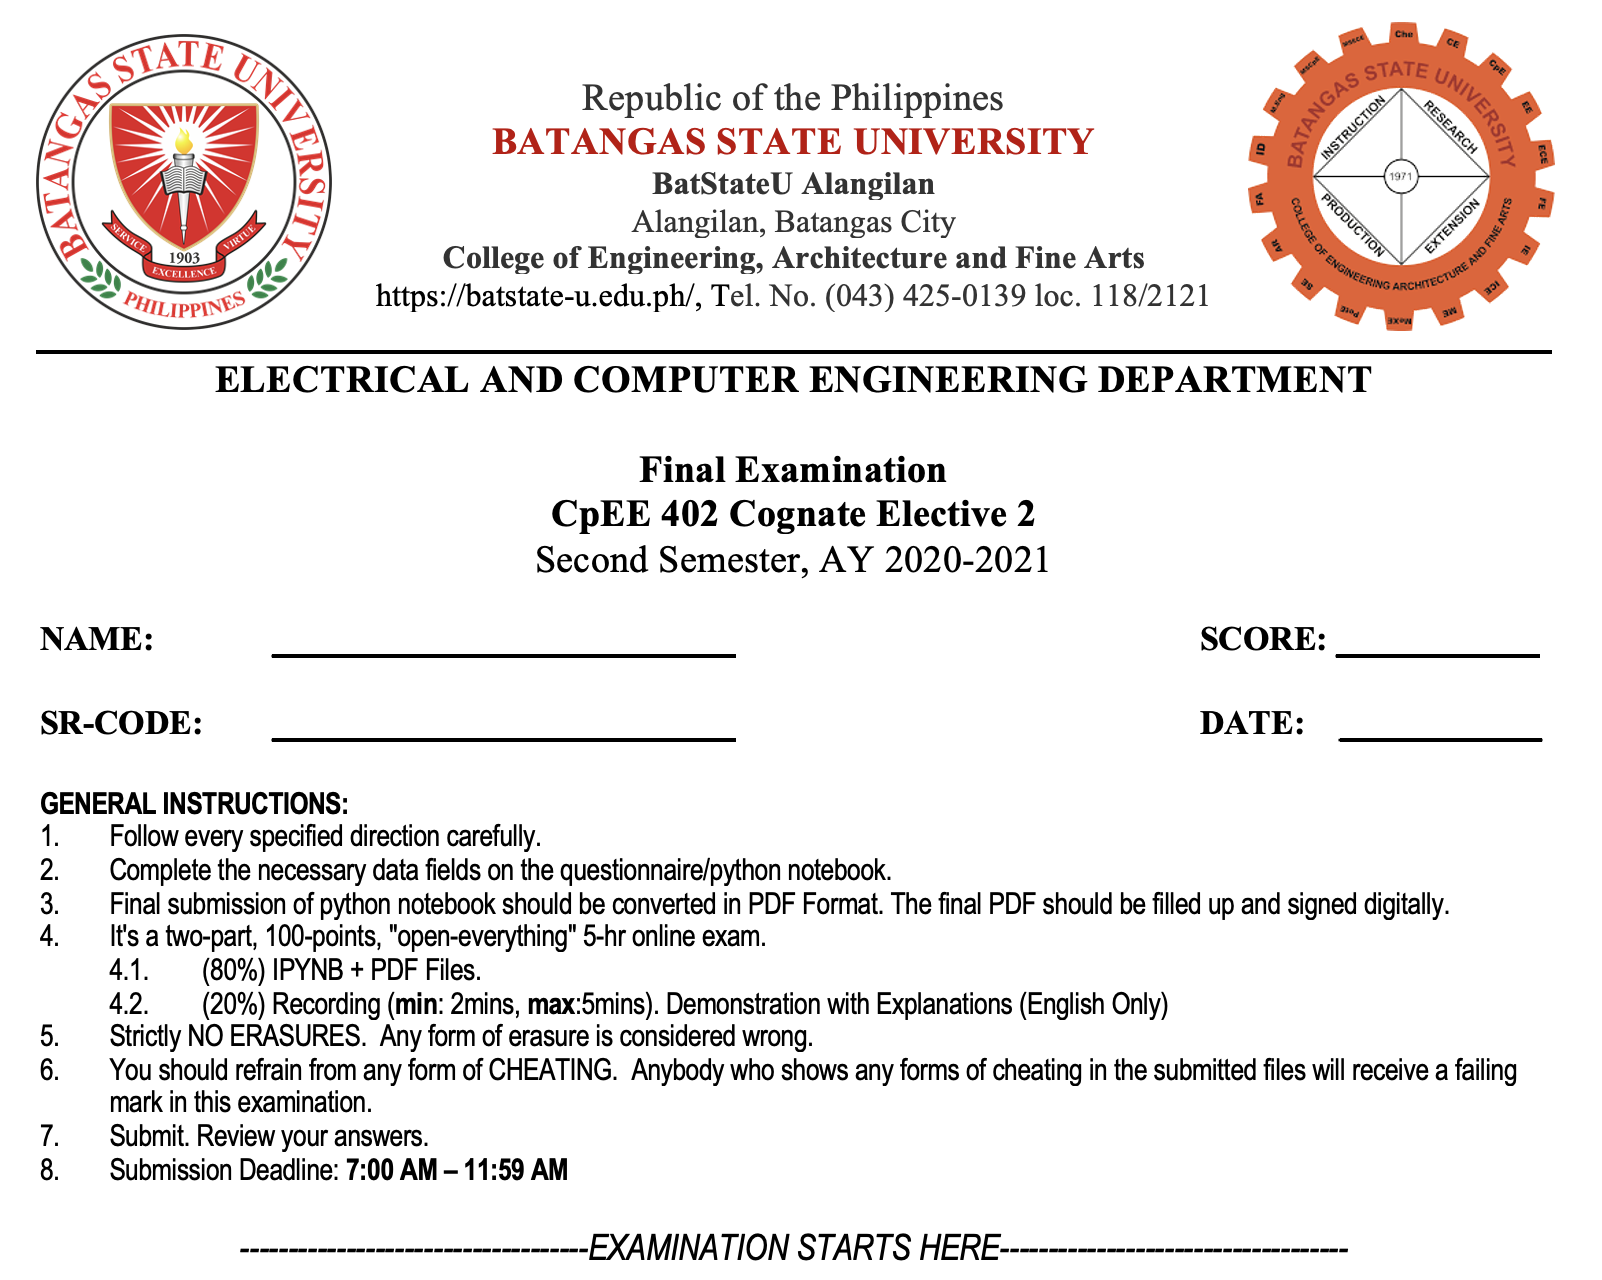

## I. PROBLEM STATEMENT

Define and explain the classification problem you want to solve. (Min of 100, Max of 300 Words)

I want to classify if a certain wine product passed or does have a good quality using physicochemical and sensory variables. In the industry of wine production, assessing the quality of the product itself is very important so that the consumers' safety and satisfaction will be assured especially by different wine industries and companies. If the product has bad qualities or didn't passed the test, it might lead to costumers' dissatisfaction as well as might lead to different health risks.


## II. DATASET DESCRIPTION

Look for Public Datasets. Define and Explain the dataset you will use for classification-ensemble problem you want to solve. Include the link of where the public dataset downloaded (Min of 100, Max of 300 Words)

The dataset that I've used is from Kaggle.com(https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009). This is related to red variants of the Portuguese "Vinho Verde" wine. It has a total of 12 columns and 1600 rows. It consists of the following:

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)


## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data

In [166]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt 

In [167]:
## Insert code here:
data = pd.read_csv('winequality-red.csv')

### 2. Get an overview of the dataset:

In [168]:
## Insert code here:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 3. Print the first five and last five rows of the dataset

In [169]:
## Insert code here:

# first five rows

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [170]:
# last five rows

data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### 4. Find the summary statistics of the dataset

In [171]:
## Insert code here:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

In [172]:
## Insert code here:

def missingData(test):
    null_data = test.isnull()
    total = null_data.sum()
    percent = 100*null_data.mean()    
    missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['count_missing', 'percentage_missing'])
    missing_data.sort_values(by='count_missing', ascending=False, inplace=True)
    return missing_data


missingData(data)

,count_missing,percentage_missing
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


### 6. Plot the nullity matrix and nullity correlation heatmap.

Since, there are no missing values, this is not necessary.

### 7. Delete the columns having more than 80% of values missing.

Since there are no missing values, this will not be performed.



In [173]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [174]:
data['quality_binary'] = data.quality.apply(lambda x : 1 if x >5 else 0)

In [175]:
data.quality_binary.value_counts()

1    855
0    744
Name: quality_binary, dtype: int64

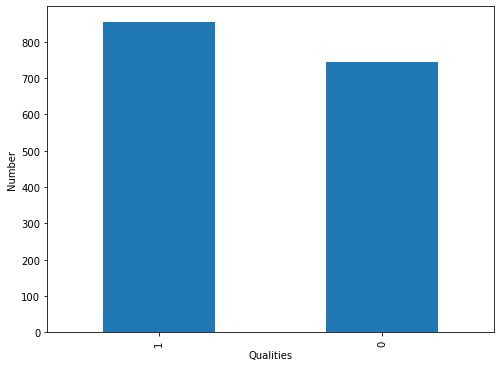

In [176]:
plt.figure(figsize=(8,6))
data.quality_binary.value_counts().plot(kind='bar')
plt.ylabel('Number')
plt.xlabel('Qualities')
plt.show()

In [177]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation

Since there are no missing data in our dataset, the imputing of null values is not necessary. 

### 9. Use OneHotEncoder. Process the dataset to convert all features to numerical values. First, find the number of columns that will stay in their original form (that is, numerical features) and that need to be one-hot encoded (that is, the categorical features). Use OneHotEncoder.

Since all of the data are numerical values, OneHotEncoder will not be used.



### 10. Export the Cleaned Dataset.

In [178]:
## Insert code here:
data.to_csv('cleaned data.csv')

## IV.  AI MODELLING - APPLIED CLASSIFICATION ANALYSIS (ACA) using ENSEMBLE

### 1. Import the required dependencies.

In [179]:
## Insert your code here:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV as GSCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score as ac_score
from sklearn.metrics import precision_score as prec_score
from sklearn.metrics import recall_score as rec_score
from sklearn.metrics import confusion_matrix as conf_mat
from sklearn.metrics import classification_report as class_rep
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve

### 2. Read the cleaned data.

In [180]:
## Insert your code here:

data2 = pd.read_csv('cleaned data.csv', index_col=0)
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [181]:
data2.shape

(1599, 13)

### 3. Divide the dataset into train and validation DataFrames.



In [182]:
## Insert your code here:

X = data2.drop(columns = ['quality', 'quality_binary']).values
y = data2.quality_binary.values

scaler = MinMaxScaler().fit(X)
X1 = scaler.transform(X)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
X_val, X_val_test, y_val, y_val_test = train_test_split(X_train, y_train, test_size=0.2)

print('X_train shape: '+ str(X_train.shape))
print('y_train shape: '+ str(y_train.shape))

print('X_test shape: '+ str(X_test.shape))
print('y_test shape: '+ str(y_test.shape))

print('X_val shape: '+ str(X_val.shape))
print('y_val shape: '+ str(y_val.shape))

print('X_val_test shape: '+ str(X_val_test.shape))
print('y_val_test shape: '+ str(y_val_test.shape))

X_train shape: (1279, 11)
y_train shape: (1279,)
X_test shape: (320, 11)
y_test shape: (320,)
X_val shape: (1023, 11)
y_val shape: (1023,)
X_val_test shape: (256, 11)
y_val_test shape: (256,)


### 4. Construct an Ensemble model (STACKING Ensemble) using 2 base classifiers and 1 stacked model as classifier. 

NOTE: 
1. Hyperparameter Tuning: Choose a base classifier model and define the range of hyperparameter values corresponding to the model to be searched over for hyperparameter tuning. Use RandomizedSearchCV or any Hyperparameter tuning techniques. 
2. Once the tuning is complete, find the position (iteration number) at which the highest mean test score was obtained. Find the corresponding hyperparameters to be used for your based models and stacked model.
3. Split the dataset into training and validation sets and train a new model using the final hyperparameters on the training dataset. Use scikit-learn's train_test_split() method to split X and y into train and test components, with test comprising 15% of the dataset or any which can attain your target accuracy:
4. Train both your base models and stacked model using the final hyperparamters used from the hyperparameter tuning done in step 2.

# Modelling and Hyperparameter Tuning

In [184]:
## Insert your code here:

#For Random Forest Classifier
rf = RandomForestClassifier()

In [185]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [186]:
#for Random Forest Classifier HyperTuning
rf_max_feature_range = np.arange(1,6,1)
rf_n_estimator_range = np.arange(10,101,10)
rf_param_grid = dict(max_features=rf_max_feature_range, n_estimators=rf_n_estimator_range)
rf_grid = GSCV(estimator=rf, param_grid=rf_param_grid, cv=5)

In [187]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [188]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_features': 2, 'n_estimators': 70}
0.8068964460784314


------------------

In [189]:
#For Decision Tree Classifier
dtc = DecisionTreeClassifier()

In [190]:
dtc.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [191]:
dtc_max_feature_range = np.arange(1,7,1)
dtc_min_sample_split_range = np.arange(2,40,1)
dtc_param_grid = dict(max_features=dtc_max_feature_range, min_samples_split=dtc_min_sample_split_range)
dtc_grid = GSCV(estimator=dtc, param_grid=dtc_param_grid, cv=5)

In [192]:
dtc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])})

In [193]:
print(dtc_grid.best_params_)
print(dtc_grid.best_score_)

{'max_features': 4, 'min_samples_split': 2}
0.7435600490196078


--------------------------------------------------------------------------

# Model Training

In [194]:
#For stack model
estimators = [('rf2', RandomForestClassifier(max_features=4, n_estimators=30)), ('dtc2', DecisionTreeClassifier(max_features=5, min_samples_split=5))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=10000))
                                                                                  

In [195]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf2',
                                RandomForestClassifier(max_features=4,
                                                       n_estimators=30)),
                               ('dtc2',
                                DecisionTreeClassifier(max_features=5,
                                                       min_samples_split=5))],
                   final_estimator=LogisticRegression(max_iter=10000))

### 5. Calculate the accuracy, precision, and recall for predictions on the validation set, and print the confusion matrix (Target F1-Score >= 80%):

In [196]:
clf_y_pred = clf.predict(X_val_test)

print('Accuracy score: '+ str(ac_score(clf_y_pred, y_val_test)))
print('Precision score: '+ str(prec_score(clf_y_pred, y_val_test)))
print('Recall score: '+ str(rec_score(clf_y_pred, y_val_test)))
print('F1 score: '+str(f1_score(clf_y_pred, y_val_test)))

Accuracy score: 0.99609375
Precision score: 1.0
Recall score: 0.9927536231884058
F1 score: 0.9963636363636363


In [197]:
clf_conf_matrix = conf_mat(y_val_test, clf_y_pred)
print(clf_conf_matrix)

[[118   1]
 [  0 137]]


### 6. Plot the precision-recall curve or the AUC-ROC Curve:

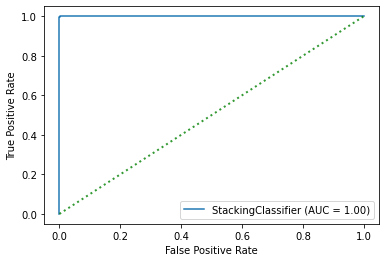

In [198]:
## Insert your code here:
plot_roc_curve(clf, X_val, y_val)
plt.plot([0,1], [0,1], linestyle='dotted', lw=2, color='g', label='Chance', alpha=0.8)
plt.show()

### 7. Predict the final values on the test dataset.

In [199]:
## Insert your code here:
clf_final_pred = clf.predict(X_test)
clf_final_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,

In [200]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [201]:
clf.score(X_test, y_test)

0.840625

### 8. Export the Final Model using PICKLE Library.

In [202]:
## Insert your code here:
import pickle

filename = 'Magpantay.pkl'
pickle.dump(clf, open(filename, 'wb'))

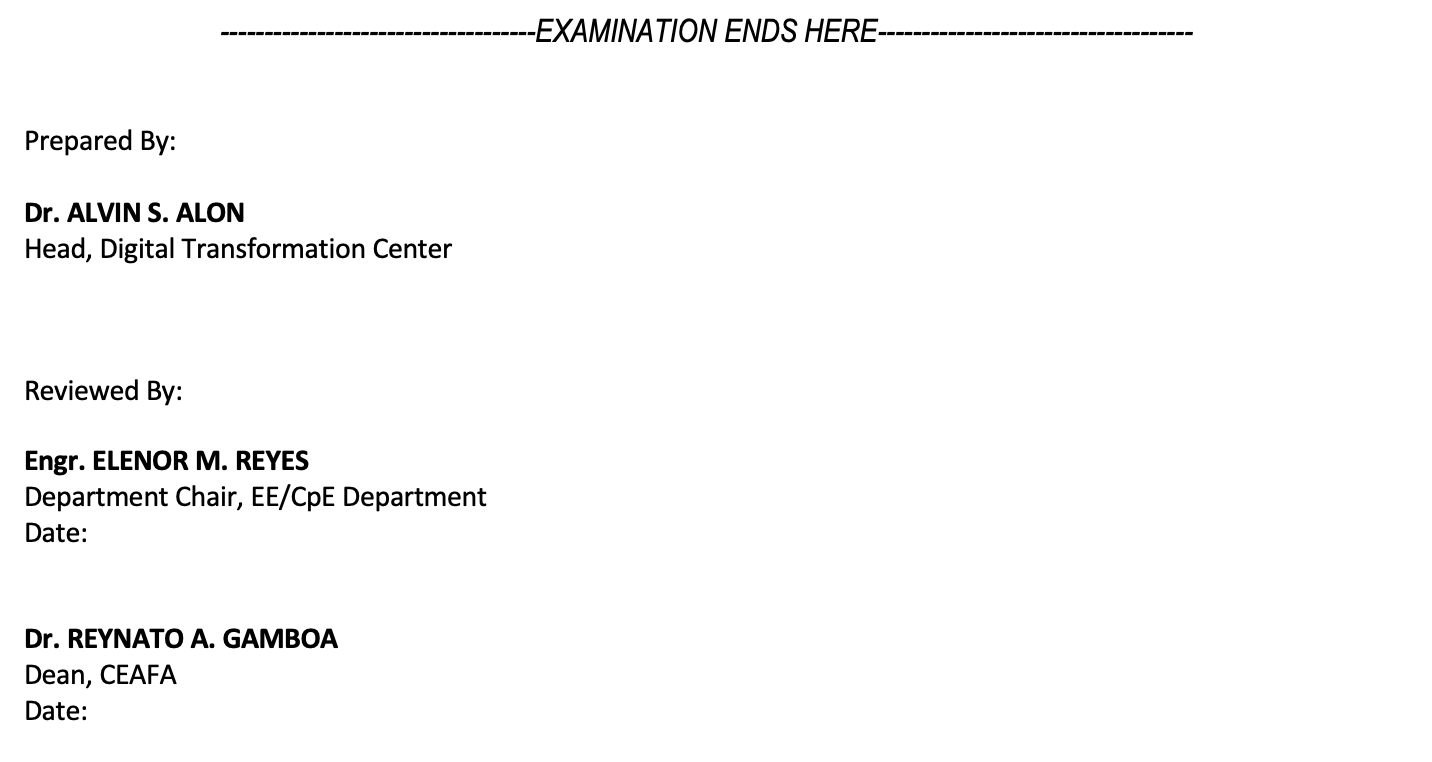